In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datasets import Dataset
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import spacy

In [20]:
nlp = spacy.load('en_core_web_sm')

In [21]:
videos = Dataset.load_from_disk('../data/videos')
labels = np.load('../data/cluster_labels.npy')

In [22]:
df = pd.DataFrame(videos)
df['label'] = labels

In [23]:
group_0 = df.loc[df['label'] == 0]

In [24]:
corpus = ''
for index, row in group_0.iterrows():
    corpus = corpus + row['title'] + row['description']

In [25]:
doc = nlp(text=corpus)

In [26]:
lemmatized_corpus = []
for token in doc:
    lemmatized_corpus.append(token)

In [37]:
lemmatized_corpus

[Twenty,
 years,
 on,
 John,
 Bolton,
 is,
 still,
 defending,
 the,
 US,
 's,
 Iraq,
 War,
 |,
 UpFront,
 John,
 Bolton,
 was,
 a,
 senior,
 adviser,
 to,
 United,
 States,
 President,
 George,
 W,
 Bush,
 on,
 matters,
 of,
 arms,
 control,
 non,
 -,
 proliferation,
 and,
 disarmament,
 in,
 the,
 lead,
 -,
 up,
 to,
 the,
 US,
 invasion,
 of,
 Iraq,
 20,
 years,
 ago,
 ....,
 Indian,
 opposition,
 leader,
 Rahul,
 Gandhi,
 disqualified,
 as,
 MP,
 |,
 Al,
 Jazeera,
 Newsfeed,
 Indian,
 opposition,
 leader,
 Rahul,
 Gandhi,
 has,
 been,
 disqualified,
 from,
 serving,
 in,
 parliament,
 a,
 day,
 after,
 receiving,
 a,
 two,
 -,
 year,
 prison,
 sentence,
 for,
 defaming,
 the,
 prime,
 minister,
 .,
 At,
 a,
 rally,
 in,
 2019,
 ...,
 Ramadan,
 in,
 Gaza,
 :,
 Many,
 fear,
 another,
 war,
 during,
 holy,
 month,
 During,
 Ramadan,
 people,
 in,
 the,
 besieged,
 Gaza,
 Strip,
 usually,
 prepare,
 for,
 a,
 month,
 of,
 fasting,
 prayers,
 and,
 celebrations,
 .,
 \r\nBut,
 many,
 ar

In [51]:
lemmatized_corpus_eng_words = []
words = set(nlp.vocab.strings)
for word in lemmatized_corpus:
    if str(word) in words and not word.is_stop and not word.is_punct and not word.is_digit and not str(word) == '|':
        lemmatized_corpus_eng_words.append(word)

In [56]:
lemmatized_sentence = " ".join([token.lemma_ for token in lemmatized_corpus_eng_words])
lemmatized_sentence

'year John Bolton defend Iraq War UpFront John Bolton senior adviser United States President George W Bush matter arm control non proliferation disarmament lead invasion Iraq year ago indian opposition leader Rahul Gandhi disqualify MP Al Jazeera Newsfeed indian opposition leader Rahul Gandhi disqualify serve parliament day receive year prison sentence defame prime minister rally Ramadan Gaza fear war holy month Ramadan people besiege Gaza Strip usually prepare month fast prayer celebration \\r\\nBut prepare possibility conflict Israel Fed right raise interest rate count Cost inflation United States hit year high past month Federal Reserve raise interest rate time rein price increases.\\r\\n\\r\\nBut policy depress israeli force storm Al Aqsa Mosque Ramadan Al Jazeera Newsfeed Videos israeli force enter Al Aqsa Mosque day Ramadan expelling worshipper accuse barricading inside reportedly arrest   \\r\\n\\r\\nsubscribe powerful tornado kill dozen Mississippi Al Jazeera Newsfeed like bomb

In [57]:
wc = WordCloud().generate_from_text(lemmatized_sentence)

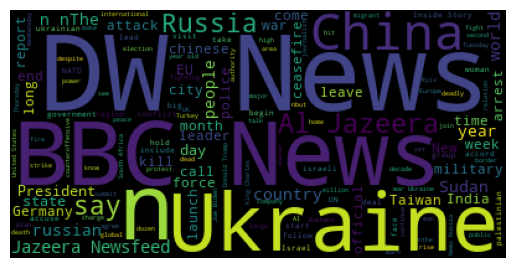

In [59]:
plt.imshow(wc)
plt.axis('off')
plt.show()